In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (12,8)


In [4]:
# Read the datafile "county_election_train.csv" as a Pandas dataframe
elect_train = pd.read_csv("data/county_election_train.csv")

# Read the datafile "county_election_test.csv" as a Pandas dataframe
elect_test = pd.read_csv("data/county_election_test.csv")

# Take a quick look at the dataframe
elect_train.head()


,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,trump,clinton,votergap
0,Alabama,1001,Autauga County,50756,2.842,22.733,51.475,5.2,54366,13.8,21.9,28.6,34.1,91.8,186.5,73.436,23.957,49.479
1,Alabama,1003,Baldwin County,179878,4.550,12.934,51.261,5.5,49626,11.0,28.6,22.3,27.4,114.6,229.4,77.351,19.565,57.786
2,Alabama,1007,Bibb County,21587,2.409,23.930,46.110,6.6,39546,22.1,10.2,33.9,40.3,36.8,230.3,76.966,21.422,55.544
3,Alabama,1009,Blount County,58345,8.954,4.229,50.592,5.4,45567,21.9,12.3,28.0,34.6,88.9,205.3,89.852,8.470,81.382
4,Alabama,1011,Bullock County,10985,7.526,72.831,45.241,7.8,26580,34.5,14.1,31.7,43.0,17.5,211.2,24.229,75.090,-50.862


In [6]:
### edTest(test_response) ###

# Creating the response variable

# Set all the rows in the train data where "trump" value is more than "clinton" 
# Ensure the results are binary i.e. 0s or 1s
y_train = (elect_train['trump'] > elect_train['clinton']).astype(int)

# Set all the rows in the test data where "trump" value is more than "clinton" 
# Ensure the results are binary i.e. 0s or 1
y_test = (elect_test['trump'] > elect_test['clinton']).astype(int)


In [6]:
type(y_train)

pandas.core.series.Series

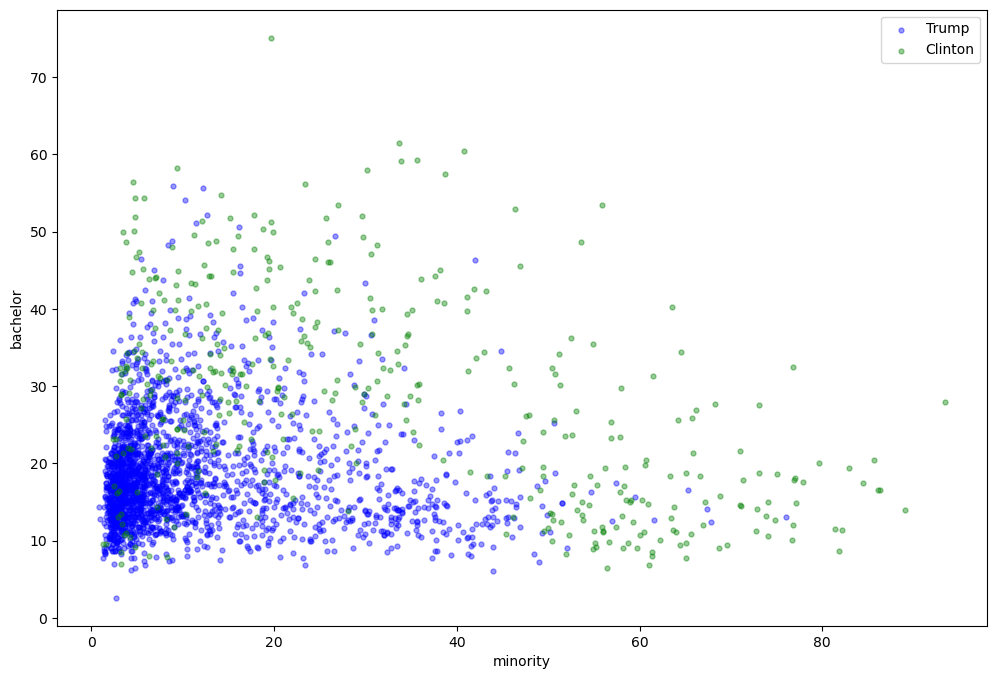

In [7]:
# Plot "minority" vs "bachelor" from the train data for Trump and Clinton
# Plot minority on the x-axis and bachelor on the y-axis
# Use different colours to depict data points associated with Trump and Clinton

plt.scatter(elect_train.loc[y_train == 1, 'minority'], elect_train.loc[y_train == 1, 'bachelor'], marker=".",color="blue",label="Trump", s=50, alpha=0.4)
plt.scatter(elect_train.loc[y_train == 0, 'minority'], elect_train.loc[y_train == 0, 'bachelor'], marker=".",color="green",label="Clinton", s=50, alpha=0.4)

plt.xlabel("minority")
plt.ylabel("bachelor")
plt.legend()
plt.show();


In [9]:
### edTest(test_model) ###
# Initialize a Decision Tree classifier of depth 3
# Choose Gini as the splitting criteria 
dtree = DecisionTreeClassifier(max_depth=3, criterion='gini')

# Fit the classifier on the train data
# but only use the minority column as the predictor variable
dtree.fit(elect_train[['minority']], y_train) # [[]] sets the df structure


DecisionTreeClassifier(max_depth=3)

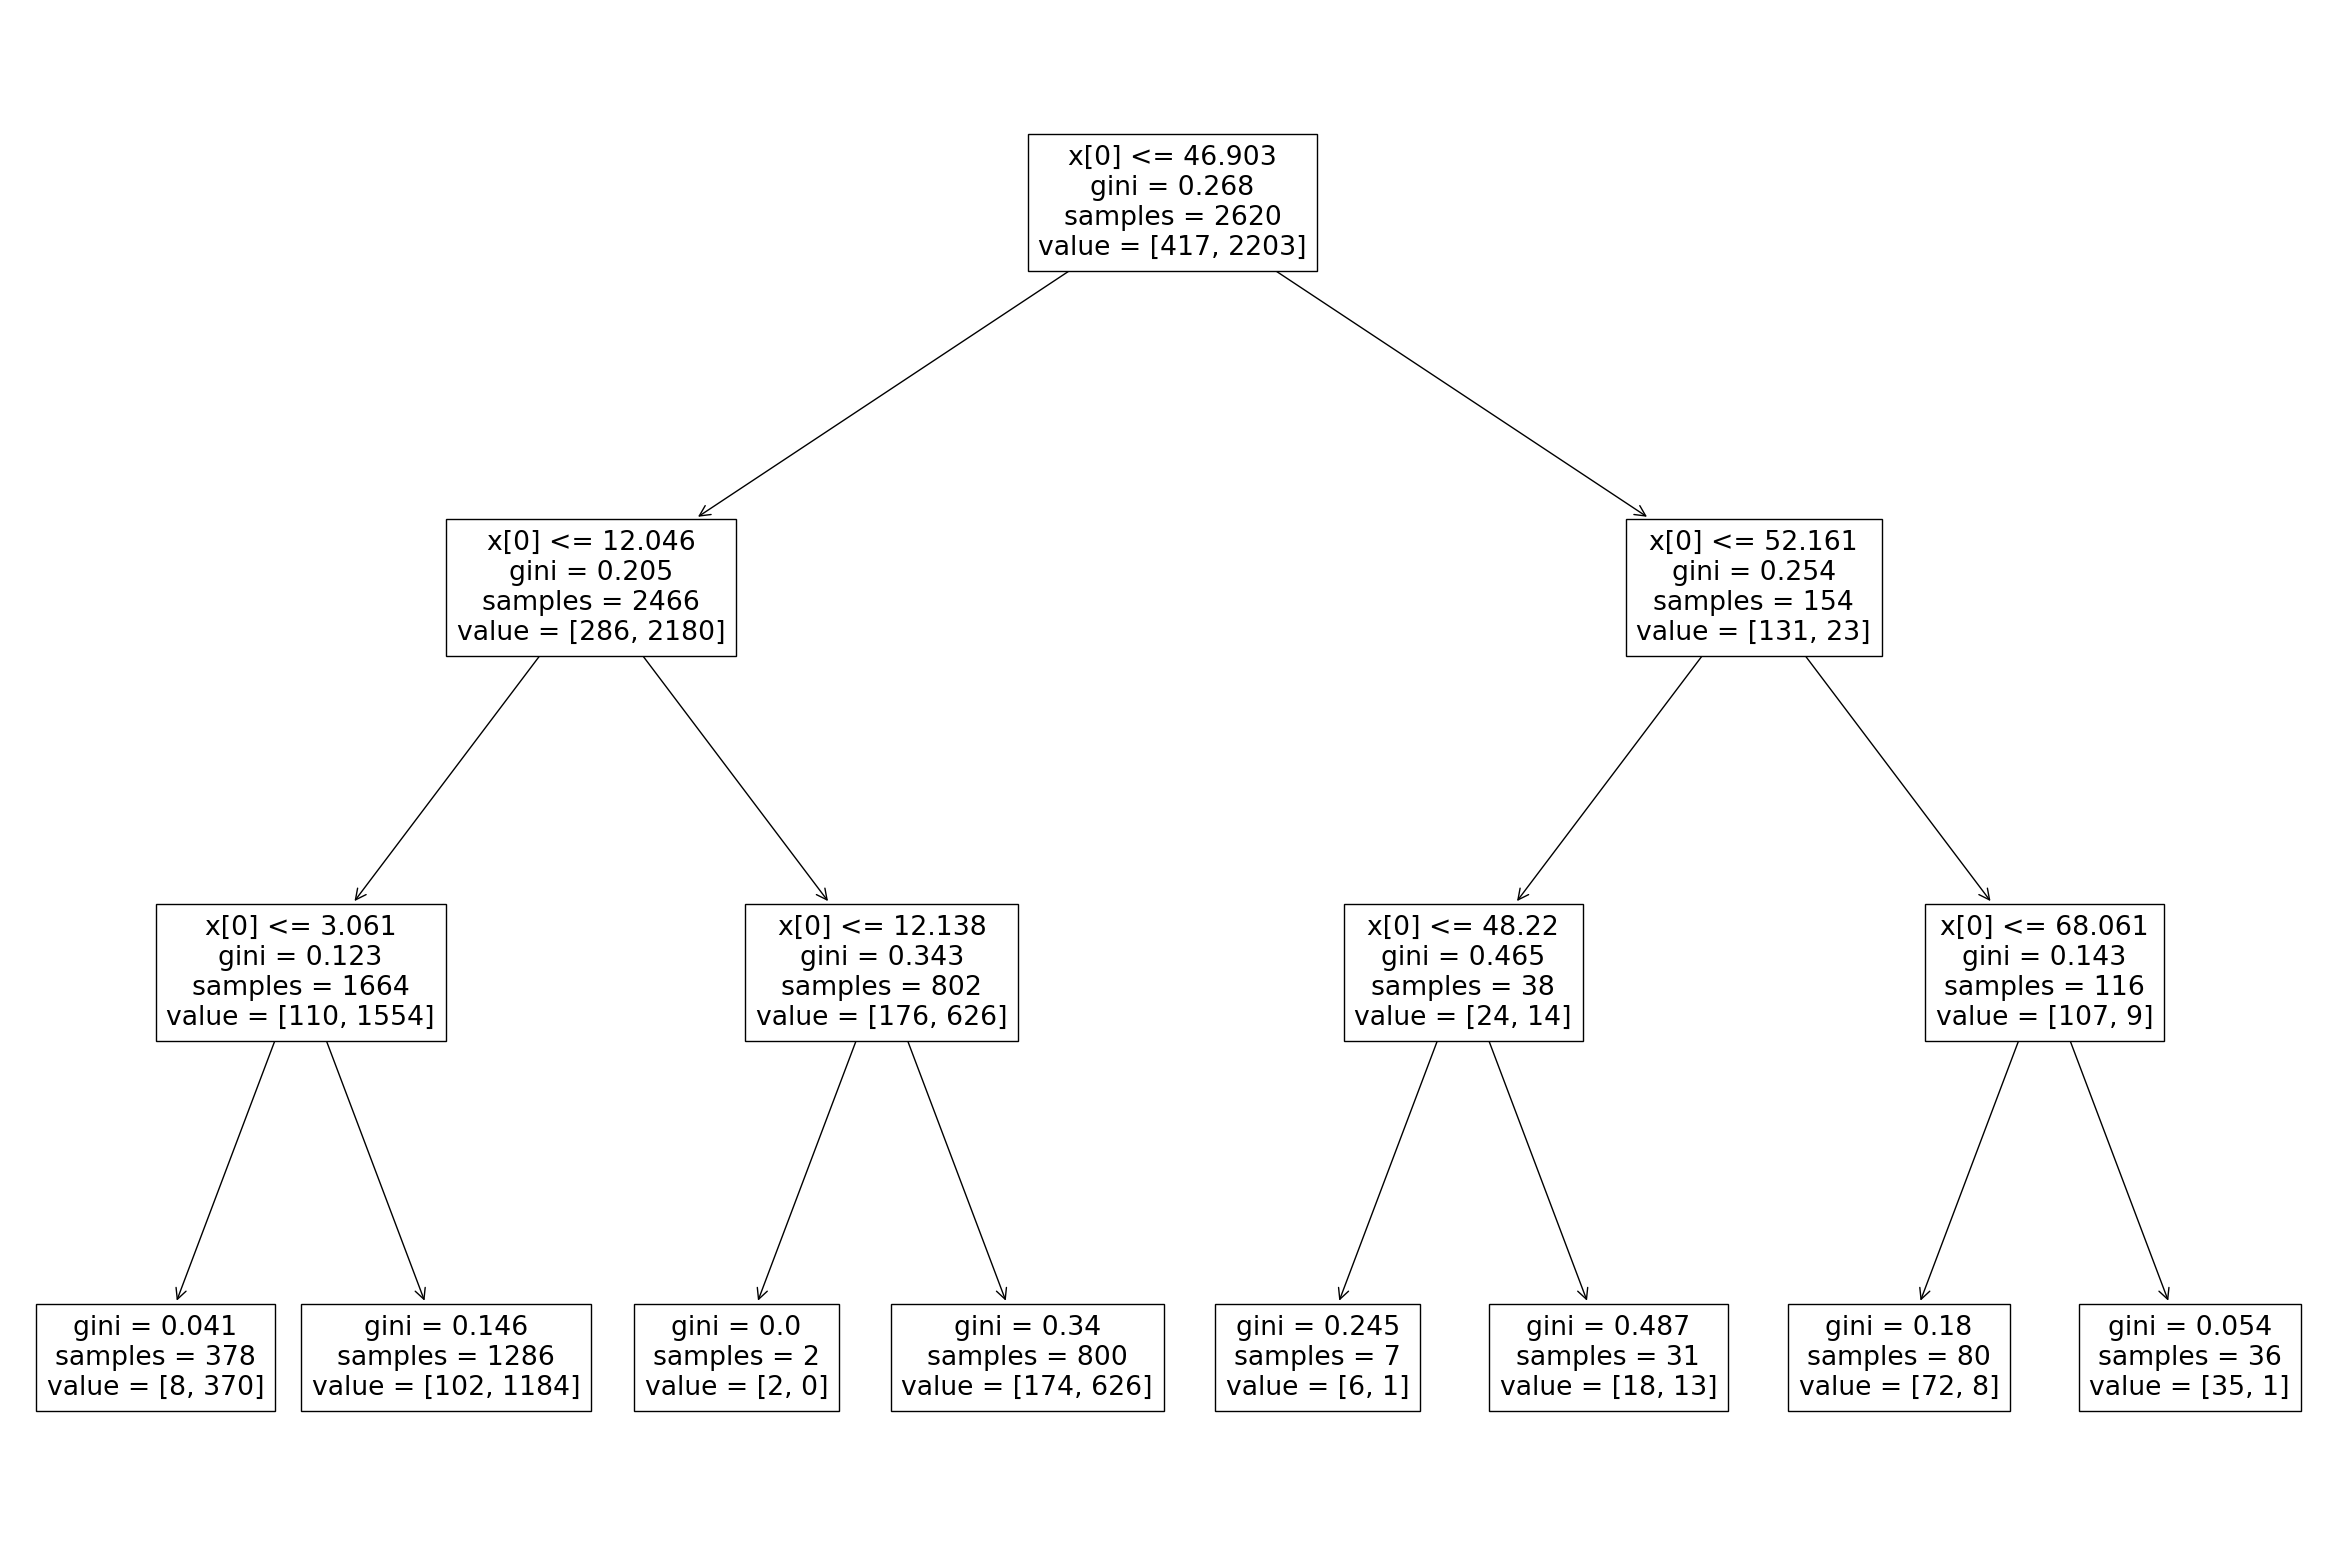

In [10]:
# Code to set the size of the plot
plt.figure(figsize=(30,20))

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(dtree)


plt.show();
